# **<center> <span style="color: pink;">ATML PA_0 </span>**

### <span style="color: DeepPink;"> Name : Khadeeja Toseef </span>
### <span style="color: DeepPink;"> Roll Number : 27100309 </span>

## <center> <span style="color: pink;">Task 3: Understanding Generative Adversarial Network Dynamics </span>

### <span style="color: HotPink;"> 1. Baseline Setup
</span>

<span style="color: MediumPurple;"> 1. Dataset Setup:
</span>

<span style="color: #D8BFD8;"> importing libraries 
</span>

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

<span style="color: #D8BFD8;"> device setup
</span>

In [3]:
device = torch.device("mps" if torch.mps.is_available() else "cpu")
device = "cpu"
print(device)

cpu


<span style="color: #D8BFD8;"> variable declaration
</span>

In [4]:
# can use 100/64 -> if reconstruction too blurry increase latent size/ if overfitting, decrease latent size 
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 50
# can use 128/64 -> 
batch_size = 64
lr = 2e-4
betas = (0.5, 0.999)
print_interval = 400
show_interval = num_epochs // 5

<span style="color: #D8BFD8;"> tranformations
</span>

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])

<span style="color: #D8BFD8;"> data downloading and loading
</span>

In [6]:
dataset = datasets.MNIST(root="./task3data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

<span style="color: MediumPurple;"> 2. Model Architecture:
</span>

<span style="color: #D8BFD8;"> generator
</span>

In [7]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
)

<span style="color: #D8BFD8;"> discriminator
</span>

In [8]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
)

<span style="color: #D8BFD8;"> initialization
</span>

In [9]:
D = D.to(device)
G = G.to(device)

<span style="color: MediumPurple;"> 3. Training Setup:
</span>

In [10]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=lr, betas=betas)
g_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=betas)
total_step = len(data_loader)

In [11]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

<span style="color: MediumPurple;"> 4. Training Loop:
</span>

Epoch [1/50], Step [400/937], d_loss: 0.3274, g_loss: 2.5213, D(x): 0.97, D(G(z)): 0.25
Epoch [1/50], Step [800/937], d_loss: 0.4216, g_loss: 2.3182, D(x): 0.77, D(G(z)): 0.07
Epoch [2/50], Step [400/937], d_loss: 0.4619, g_loss: 2.8243, D(x): 0.79, D(G(z)): 0.08
Epoch [2/50], Step [800/937], d_loss: 0.1775, g_loss: 3.2181, D(x): 0.89, D(G(z)): 0.04
Epoch [3/50], Step [400/937], d_loss: 0.2684, g_loss: 3.9568, D(x): 0.92, D(G(z)): 0.10
Epoch [3/50], Step [800/937], d_loss: 0.2165, g_loss: 2.8082, D(x): 0.89, D(G(z)): 0.06
Epoch [4/50], Step [400/937], d_loss: 1.2932, g_loss: 6.8973, D(x): 0.59, D(G(z)): 0.00
Epoch [4/50], Step [800/937], d_loss: 0.2959, g_loss: 7.2842, D(x): 0.97, D(G(z)): 0.22
Epoch [5/50], Step [400/937], d_loss: 0.1102, g_loss: 3.8137, D(x): 0.95, D(G(z)): 0.03
Epoch [5/50], Step [800/937], d_loss: 0.0822, g_loss: 4.0322, D(x): 0.97, D(G(z)): 0.04
Epoch [6/50], Step [400/937], d_loss: 0.1947, g_loss: 2.9097, D(x): 0.91, D(G(z)): 0.00
Epoch [6/50], Step [800/937], d_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


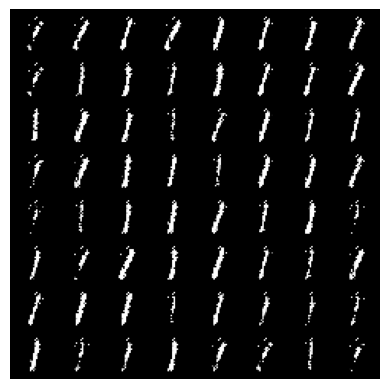

Epoch [11/50], Step [400/937], d_loss: 0.2660, g_loss: 4.7331, D(x): 0.93, D(G(z)): 0.00
Epoch [11/50], Step [800/937], d_loss: 0.1921, g_loss: 1.9920, D(x): 0.92, D(G(z)): 0.00
Epoch [12/50], Step [400/937], d_loss: 0.0557, g_loss: 3.4217, D(x): 1.00, D(G(z)): 0.05
Epoch [12/50], Step [800/937], d_loss: 0.1221, g_loss: 3.4771, D(x): 0.97, D(G(z)): 0.04
Epoch [13/50], Step [400/937], d_loss: 0.3532, g_loss: 6.6040, D(x): 0.89, D(G(z)): 0.00
Epoch [13/50], Step [800/937], d_loss: 0.3071, g_loss: 2.7832, D(x): 0.90, D(G(z)): 0.05
Epoch [14/50], Step [400/937], d_loss: 0.2763, g_loss: 2.0763, D(x): 0.90, D(G(z)): 0.09
Epoch [14/50], Step [800/937], d_loss: 0.3599, g_loss: 2.8848, D(x): 0.91, D(G(z)): 0.16
Epoch [15/50], Step [400/937], d_loss: 0.1157, g_loss: 4.0569, D(x): 0.97, D(G(z)): 0.06
Epoch [15/50], Step [800/937], d_loss: 1.0437, g_loss: 9.9260, D(x): 0.98, D(G(z)): 0.58
Epoch [16/50], Step [400/937], d_loss: 0.3052, g_loss: 1.7801, D(x): 0.88, D(G(z)): 0.05
Epoch [16/50], Step [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


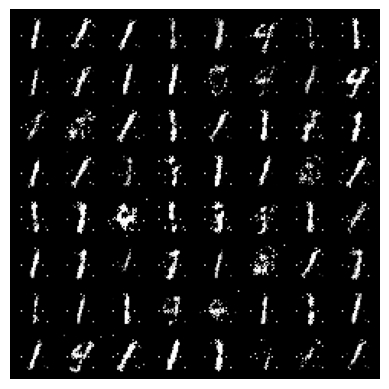

Epoch [21/50], Step [400/937], d_loss: 0.6541, g_loss: 2.9065, D(x): 0.83, D(G(z)): 0.26
Epoch [21/50], Step [800/937], d_loss: 0.8028, g_loss: 5.3806, D(x): 0.94, D(G(z)): 0.45
Epoch [22/50], Step [400/937], d_loss: 0.5903, g_loss: 1.8601, D(x): 0.77, D(G(z)): 0.11
Epoch [22/50], Step [800/937], d_loss: 0.4247, g_loss: 3.0418, D(x): 0.91, D(G(z)): 0.24
Epoch [23/50], Step [400/937], d_loss: 0.6242, g_loss: 2.4190, D(x): 0.86, D(G(z)): 0.29
Epoch [23/50], Step [800/937], d_loss: 0.5401, g_loss: 2.0333, D(x): 0.78, D(G(z)): 0.14
Epoch [24/50], Step [400/937], d_loss: 0.7539, g_loss: 1.2312, D(x): 0.67, D(G(z)): 0.13
Epoch [24/50], Step [800/937], d_loss: 0.8412, g_loss: 4.1581, D(x): 0.90, D(G(z)): 0.46
Epoch [25/50], Step [400/937], d_loss: 0.5019, g_loss: 2.2518, D(x): 0.83, D(G(z)): 0.21
Epoch [25/50], Step [800/937], d_loss: 1.1440, g_loss: 1.8607, D(x): 0.71, D(G(z)): 0.41
Epoch [26/50], Step [400/937], d_loss: 0.8319, g_loss: 1.8907, D(x): 0.69, D(G(z)): 0.23
Epoch [26/50], Step [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


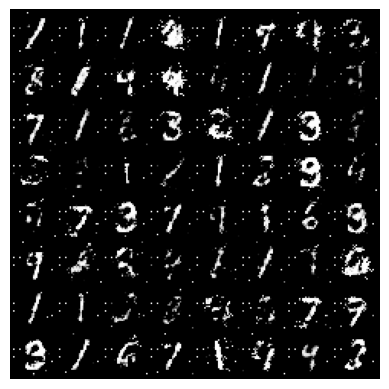

Epoch [31/50], Step [400/937], d_loss: 0.8747, g_loss: 1.6738, D(x): 0.65, D(G(z)): 0.20
Epoch [31/50], Step [800/937], d_loss: 0.6777, g_loss: 1.6853, D(x): 0.79, D(G(z)): 0.27
Epoch [32/50], Step [400/937], d_loss: 0.6222, g_loss: 1.8221, D(x): 0.79, D(G(z)): 0.26
Epoch [32/50], Step [800/937], d_loss: 0.6575, g_loss: 1.5405, D(x): 0.71, D(G(z)): 0.19
Epoch [33/50], Step [400/937], d_loss: 0.9894, g_loss: 1.3062, D(x): 0.69, D(G(z)): 0.36
Epoch [33/50], Step [800/937], d_loss: 0.7088, g_loss: 2.0901, D(x): 0.79, D(G(z)): 0.30
Epoch [34/50], Step [400/937], d_loss: 0.8439, g_loss: 2.8551, D(x): 0.86, D(G(z)): 0.41
Epoch [34/50], Step [800/937], d_loss: 0.7545, g_loss: 1.7723, D(x): 0.78, D(G(z)): 0.31
Epoch [35/50], Step [400/937], d_loss: 0.7644, g_loss: 1.5628, D(x): 0.75, D(G(z)): 0.30
Epoch [35/50], Step [800/937], d_loss: 0.7904, g_loss: 1.3497, D(x): 0.72, D(G(z)): 0.27
Epoch [36/50], Step [400/937], d_loss: 0.6256, g_loss: 1.6027, D(x): 0.76, D(G(z)): 0.20
Epoch [36/50], Step [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


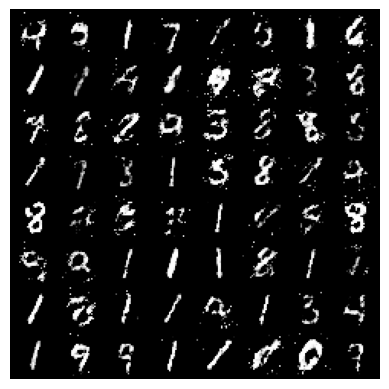

Epoch [41/50], Step [400/937], d_loss: 0.7398, g_loss: 1.6920, D(x): 0.74, D(G(z)): 0.26
Epoch [41/50], Step [800/937], d_loss: 0.8126, g_loss: 1.7961, D(x): 0.75, D(G(z)): 0.30
Epoch [42/50], Step [400/937], d_loss: 0.6942, g_loss: 2.0354, D(x): 0.79, D(G(z)): 0.27
Epoch [42/50], Step [800/937], d_loss: 0.7800, g_loss: 2.4672, D(x): 0.85, D(G(z)): 0.38
Epoch [43/50], Step [400/937], d_loss: 0.6609, g_loss: 2.2486, D(x): 0.78, D(G(z)): 0.27
Epoch [43/50], Step [800/937], d_loss: 0.8062, g_loss: 1.4115, D(x): 0.66, D(G(z)): 0.18
Epoch [44/50], Step [400/937], d_loss: 0.6802, g_loss: 1.7720, D(x): 0.79, D(G(z)): 0.27
Epoch [44/50], Step [800/937], d_loss: 0.7643, g_loss: 2.2386, D(x): 0.76, D(G(z)): 0.29
Epoch [45/50], Step [400/937], d_loss: 0.7430, g_loss: 2.0041, D(x): 0.81, D(G(z)): 0.33
Epoch [45/50], Step [800/937], d_loss: 0.7475, g_loss: 1.3591, D(x): 0.71, D(G(z)): 0.23
Epoch [46/50], Step [400/937], d_loss: 0.7259, g_loss: 1.6703, D(x): 0.76, D(G(z)): 0.26
Epoch [46/50], Step [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


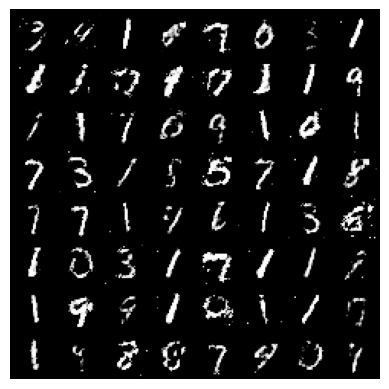

In [12]:
# real_labels = torch.ones(batch_size, 1).to(device)
# fake_labels = torch.zeros(batch_size, 1).to(device)

# for epoch in range(num_epochs):
#     for i, (images, _) in enumerate(data_loader):
#         images = images.reshape(batch_size, -1).to(device)
        
#         # train discriminator
#         # real images
#         outputs = D(images)
#         d_loss_real = criterion(outputs, real_labels)
#         real_score = outputs.mean().item()
        
#         # fake images
#         z = torch.randn(batch_size, latent_size).to(device)
#         fake_images = G(z)
#         outputs = D(fake_images)
#         d_loss_fake = criterion(outputs, fake_labels)
#         fake_score = outputs.mean().item()
        
#         d_loss = d_loss_real + d_loss_fake
#         reset_grad()
#         d_loss.backward()
#         d_optimizer.step()
        
#         # train generator
#         z = torch.randn(batch_size, latent_size).to(device)
#         fake_images = G(z)
#         outputs = D(fake_images)
        
#         g_loss = criterion(outputs, real_labels)
#         reset_grad()
#         g_loss.backward()
#         g_optimizer.step()
        
#         if (i + 1) % print_interval == 0:
#             print(
#                 f"Epoch [{epoch+1}/{num_epochs}], "
#                 f"Step [{i+1}/{total_step}], "
#                 f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
#                 f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}"
#             )
#     if (epoch + 1) % show_interval == 0:
#         fake_images = fake_images.reshape(batch_size, 1, 28, 28).detach()
#         plt.imshow(make_grid(fake_images).permute(1, 2, 0))
#         plt.axis("off")
#         plt.show()


import matplotlib.pyplot as plt

# Store loss values
d_losses = []
g_losses = []

real_labels = torch.ones(batch_size, 1).to(device)
fake_labels = torch.zeros(batch_size, 1).to(device)

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Train discriminator
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs.mean().item()
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs.mean().item()
        
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # Train generator
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        g_loss = criterion(outputs, real_labels)
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        # Save loss values
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
        
        if (i + 1) % print_interval == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], "
                f"Step [{i+1}/{total_step}], "
                f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
                f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}"
            )
    if (epoch + 1) % show_interval == 0:
        fake_images = fake_images.reshape(batch_size, 1, 28, 28).detach()
        plt.imshow(make_grid(fake_images).permute(1, 2, 0))
        plt.axis("off")
        plt.show()



<span style="color: MediumPurple;"> 5. Print training progress: 
</span>

<span style="color: MediumPurple;"> 6. Monitoring:
</span>

<span style="color: MediumPurple;"> 7. Results and Discussion:
</span>

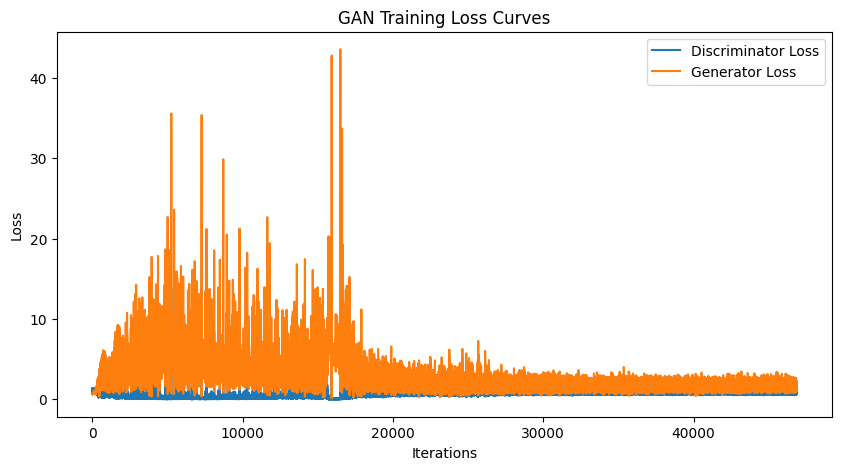

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Loss Curves")
plt.legend()
plt.show()

### <span style="color:DarkCyan;"> After training, plot the loss curves for D and G over epochs (or training iterations). Do they exhibit the dynamics you expect (e.g., D’s loss initially goes down while G’s goes up, etc.) or any signs of instability (e.g., oscillations)? Comment on these observations.
</span>

ANSWER = <span style="color: #D8BFD8;">
... 
</span>

### <span style="color:DarkCyan;"> Comment on the quality: Do the images look like recognizable digits? Is there variety, and does the noise input seem to meaningfully affect the output? It is okay if some outputs are imperfect (e.g., blobs that resemble digits). For reference, even a simple MLP GAN can produce digit-like shapes – not perfectly, but often recognizable.
</span>

ANSWER = <span style="color: #D8BFD8;">
... 
</span>

### <span style="color:DarkCyan;"> Compare your results to those from the reference implementation or others’ reported results. For example, did the reference GAN produce sharper or more diverse digits? If there are differences, speculate on why. Consider factors such as: </span>
### <span style="color:DarkCyan;"> – Differences in architecture </span>
### <span style="color:DarkCyan;"> – Hyperparameter choices </span>
### <span style="color:DarkCyan;">– Random initialization effects </span>
### <span style="color:DarkCyan;">If your results differ significantly, try to identify which design decision may have contributed.
</span>

ANSWER = <span style="color: #D8BFD8;">
... 
</span>

### <span style="color: HotPink;"> 2. Experimenting with Training Issues
</span>

### <span style="color:DarkCyan;"> QUESTIONN???
</span>

ANSWER = <span style="color: #D8BFD8;">
... 
</span>